In [1]:
import numpy as np
import pandas as pd
import struct
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mappings = dict(
    frank = [0,1,2,3,4,7,6,5,10,9,8,11,12,15,14,13,18,17,16,19,20,23,22,21,26,25,24,27,28,31,30,29],
    grey = [num ^ (num >> 1) for num in range(32)],
    ugur = [0,1,2,3,4,7,6,5,12,13,14,15,11,9,8,10,26,27,25,24,28,29,30,31,23,22,20,16,17,18,19,21],
    ugur2 = [0,1,3,2,4,5,7,6,8,9,11,10,12,13,15,14,26,27,25,24,28,29,30,31,23,22,20,16,17,18,19,21]
    
)

In [3]:
npxor = np.frompyfunc(np.bitwise_xor, 2, 1)
def _lzc(t):
    return 5 - len(np.binary_repr(t))
lzc = np.frompyfunc(_lzc, 1, 1)

In [4]:
def generate_mean_lzc_with_mappings(mu, sigma, mappings):
    # generate data
    data = np.random.normal(mu, sigma, 100000)
    int_data = data.round(0).astype('int8')

    # cleanup data
    int_data[int_data<=0]=0
    int_data[int_data>=32]=0
    assert int_data.max() <= 32 and int_data.min() >= 0, "Eer"

    result = {}
    # orginal lzc
    residual = npxor(int_data, mu)
    avg = lzc(residual).mean()
    result['original'] = [avg]
    # print("Original: {}".format(avg))

    for k,mapping in mappings.items():
        new_data = [mapping[x] for x in int_data]
        residual = npxor(new_data, mu)
        avg = lzc(residual).mean()
        result[k] = [avg]
    #     print("Mapping:  {}".format(avg))
    return result

In [11]:
mu = np.arange(5, 16)
sigmas = [
#     0.25 * mu,
#     0.2 * mu,
#     0.15 * mu,
#     0.1 * mu,
#     0.05 * mu,
    [4] * mu.size,
    [3] * mu.size,
    [1] * mu.size,
]

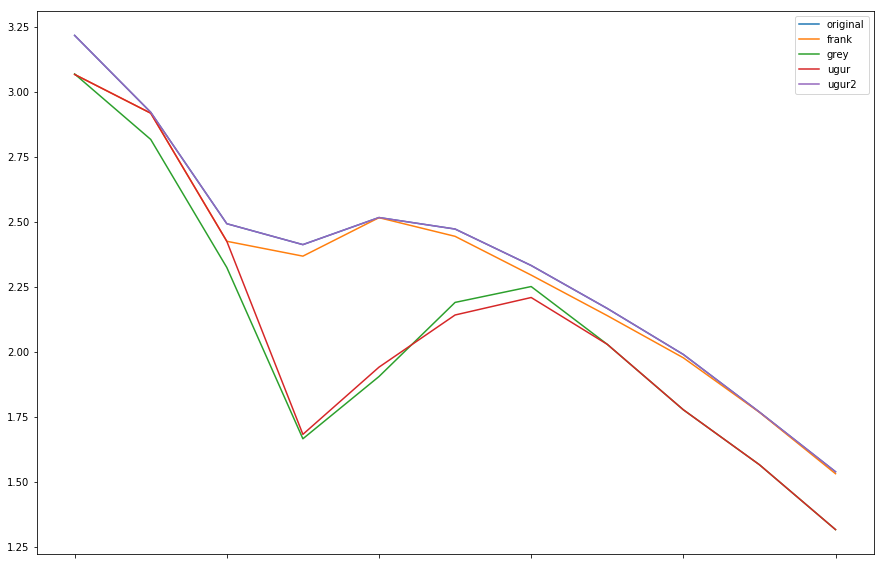

In [12]:
df = pd.DataFrame()
for i,m in enumerate(mu):
    sig = .3 * m
    r = generate_mean_lzc_with_mappings(m, sig, mappings)
    df = df.append(pd.DataFrame(r, index=['mu:{},sigma:{}'.format(m,sig)]))
df.plot(figsize=(15,10));

In [13]:
df.idxmax(axis=1)

mu:5,sigma:1.5                    original
mu:6,sigma:1.7999999999999998     original
mu:7,sigma:2.1                    original
mu:8,sigma:2.4                    original
mu:9,sigma:2.6999999999999997     original
mu:10,sigma:3.0                   original
mu:11,sigma:3.3                   original
mu:12,sigma:3.5999999999999996    original
mu:13,sigma:3.9                   original
mu:14,sigma:4.2                   original
mu:15,sigma:4.5                   original
dtype: object

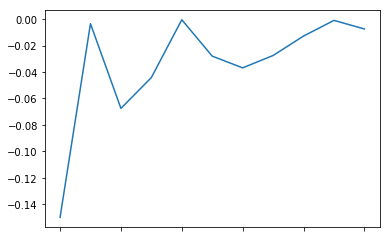

In [14]:
(df['frank']-df['original']).plot()

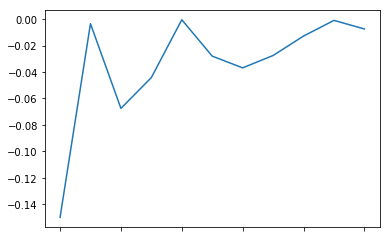

In [17]:
(df['frank']-df['ugur2']).plot()

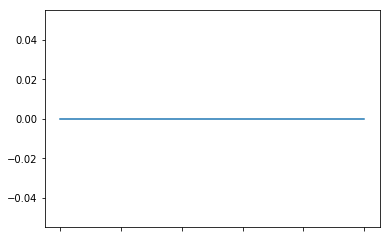

In [19]:
(df['original']-df['ugur2']).plot()